In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install pandas

You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
!pip install matplotlib

You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


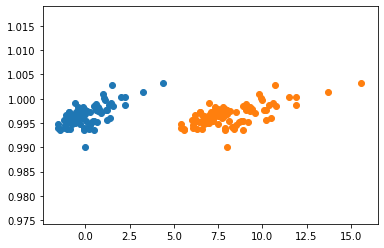

In [29]:
dfx=pd.read_csv("linearX.csv")
dfy=pd.read_csv("linearY.csv")

x=dfx.values
y=dfy.values

X=(x-x.mean())/x.std()
Y=y

plt.scatter(X,Y)

plt.scatter(x,y)
plt.show()

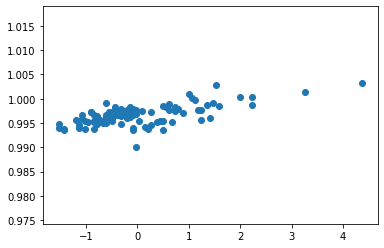

In [37]:
plt.scatter(X,Y)
plt.show()

In [51]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x


def error(X,Y,theta):
    m=X.shape[0]
    err=0
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        err+=(hx-Y[i])**2
        
    return err


def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    
    for i in range(m):
        grad[0]+=(hypothesis(X[i],theta)-Y[i])
        grad[1]+=(hypothesis(X[i],theta)-Y[i])*X[i]
        
    return grad

# main ALGO
def linearReg(X,Y,lrate=0.001):
    
    theta=np.zeros((2,))
    
    itr=0;
    max_itr=1000
    
    error_list=[]
    while(itr<=max_itr):  
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        # when error will start to decrease grad[0] & grad[1]
        # will converge to 0 & theta will become constant
        theta[0]=theta[0]-lrate*grad[0]
        theta[1]=theta[1]-lrate*grad[1]
        itr+=1
    return theta,error_list


    
        

In [52]:
final_theta,error_list=linearReg(X,Y)

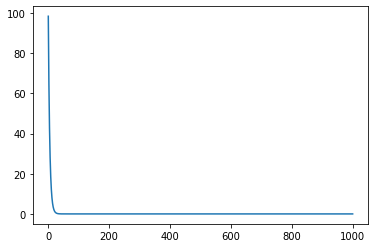

[0.99663414 0.00135794]


In [53]:
plt.plot(error_list)
plt.show()
print(final_theta)

In [54]:
xtest=np.linspace(-2,6,4)
print(xtest)

[-2.          0.66666667  3.33333333  6.        ]


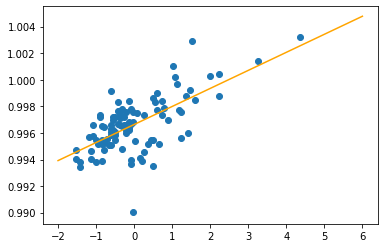

In [55]:
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange')
plt.scatter(X,Y)
plt.show()

## self_wriiten linear regression code

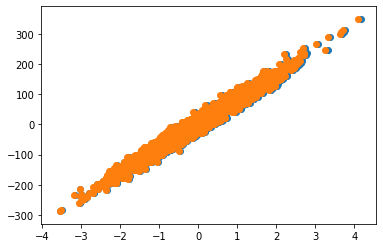

In [102]:
dfx=pd.read_csv("Linear_X_Train.csv")
dfy=pd.read_csv("Linear_Y_Train.csv")

x=dfx.values
y=dfy.values

X=(x-x.mean())/x.std()
Y=y

plt.scatter(X,Y)

plt.scatter(x,y)
plt.show()

In [ ]:
def hypo(x,theta):
    return theta[0]+theta[1]*x

def error2(X,Y,theta):
    m=X.shape[0]
    err=0
    for i in range(m):
        err+=(hypo(X[i],theta)-Y[i])**2
        
    return err

def changeInGrad(X,Y,theta):
    
    m=X.shape[0]
    grad=np.zeros((2,))
    
    for i in range(m):
        grad[0]+=(hypo(X[i],theta)-Y[i])
        grad[1]+=(hypo(X[i],theta)-Y[i])*X[i]
        
    return grad

def linerReg2(X,Y,lrate=0.001):
    
    theta=np.zeros((2,))
    error_list=[]
    e=error2(X,Y,theta)
    
    itr=0;
    while(itr<1000):
        grad=changeInGrad(X,Y,theta)
        e=error2(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-lrate*grad[0]
        theta[1]=theta[1]-lrate*grad[1]
        itr+=1
        
    return theta,error_list
        

In [ ]:
final_theta,error_lit=linerReg2(X,Y)
print(final_theta)

plt.plot(error_lit)
plt.show()

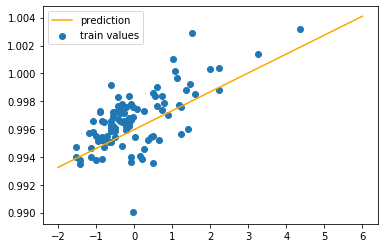

In [101]:
xtest2=np.linspace(-2,6,10)

plt.plot(xtest2,hypo(xtest2,final_theta),color='orange',label="prediction")
plt.scatter(X,Y,label="train values")
plt.legend()
plt.show()